In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heights-and-weights/data.csv


In [2]:
data=pd.read_csv('/kaggle/input/heights-and-weights/data.csv')
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [3]:
data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [4]:
y = data['Weight']

In [5]:
x = np.array(data['Height']).reshape(-1,1)
x

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_,"intercept_",reg.intercept_)

[61.64761469] intercept_ -39.54296905959457


In [8]:
y_predict=reg.predict(X_test)
y_predict

array([67.10740436, 60.94264289, 68.34035665])

In [9]:
from sklearn import metrics
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Root Mean Squared Error: 0.7676403055967664


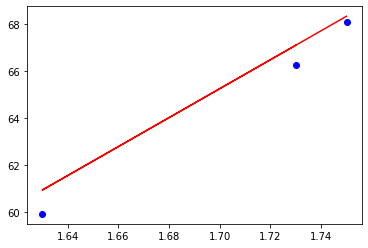

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test , color = 'b')
plt.plot(X_test, y_predict, color = 'red')
